In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder

In [91]:
def wrangle(filepath):

    df = pd.read_csv(filepath)

    # #creating  binary
    df['Grades']= (df['Grades']>8).astype(int)

    # #dropping student_ID column
    df.drop(columns= 'Student_ID',inplace = True)
    df.drop(columns= 'Gender',inplace = True)


    return df

In [92]:
df1 = wrangle(r"C:\Users\HP\Desktop\student_lifestyle_dataset..csv")

In [93]:
df2= pd.read_csv(r"C:\Users\HP\Desktop\synthetic_student_lifestyle_10000.csv")


In [97]:
#i want to conbine dataset
df = pd.concat([df , df2])

In [96]:
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Grades
0,6.900000,3.800000,8.700000,2.800000,1.800000,Moderate,0
1,5.300000,3.500000,8.000000,4.200000,3.000000,Low,0
2,5.100000,3.900000,9.200000,1.200000,4.600000,Low,0
3,6.500000,2.100000,7.200000,1.700000,6.500000,Moderate,0
4,8.100000,0.600000,6.500000,2.200000,6.600000,High,1
...,...,...,...,...,...,...,...
9995,7.602204,1.887827,6.422712,3.679477,1.045439,Moderate,1
9996,1.003310,2.877367,8.444604,2.397551,0.980062,High,0
9997,3.589367,1.878354,6.498633,2.924752,1.400068,Moderate,0
9998,5.991531,3.213530,5.107643,3.221935,1.212172,Moderate,0


In [100]:

df.drop(columns=['Stress_Level', 'Grades']).round(2)


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day
0,6.90,3.80,8.70,2.80,1.80
1,5.30,3.50,8.00,4.20,3.00
2,5.10,3.90,9.20,1.20,4.60
3,6.50,2.10,7.20,1.70,6.50
4,8.10,0.60,6.50,2.20,6.60
...,...,...,...,...,...
9995,7.60,1.89,6.42,3.68,1.05
9996,1.00,2.88,8.44,2.40,0.98
9997,3.59,1.88,6.50,2.92,1.40
9998,5.99,3.21,5.11,3.22,1.21


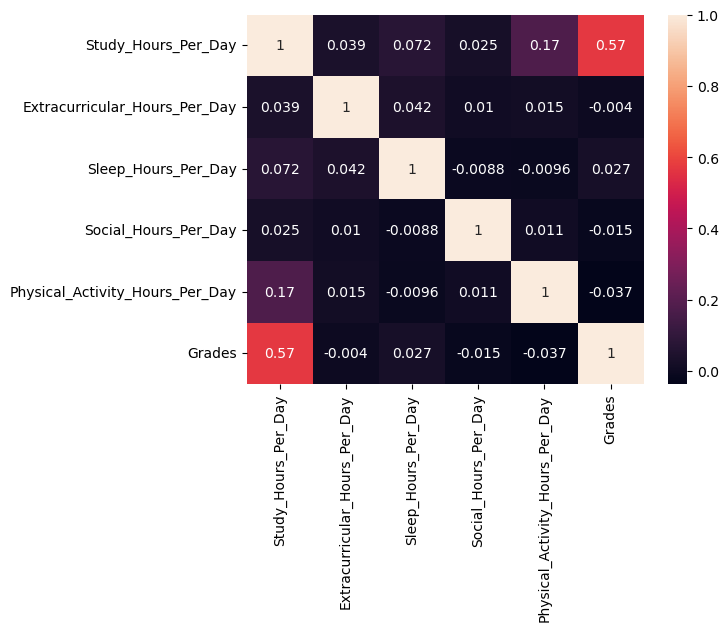

In [101]:
#checking multicollinearity column

correlation = df.select_dtypes('number')
sns.heatmap(correlation.corr(), annot = True)
plt.show()

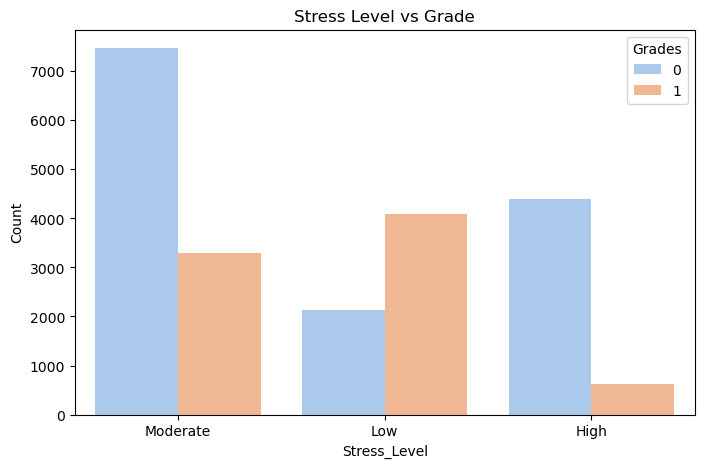

In [102]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Stress_Level', hue='Grades', palette='pastel')
plt.title('Stress Level vs Grade')
plt.ylabel('Count')
plt.show()

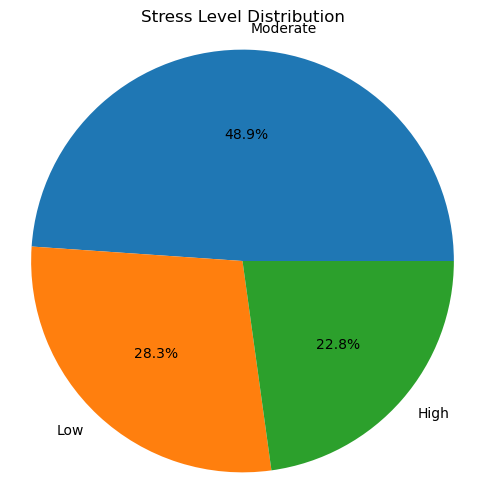

In [103]:
stress_counts = df['Stress_Level'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%')
plt.title('Stress Level Distribution')
plt.axis('equal')
plt.show()

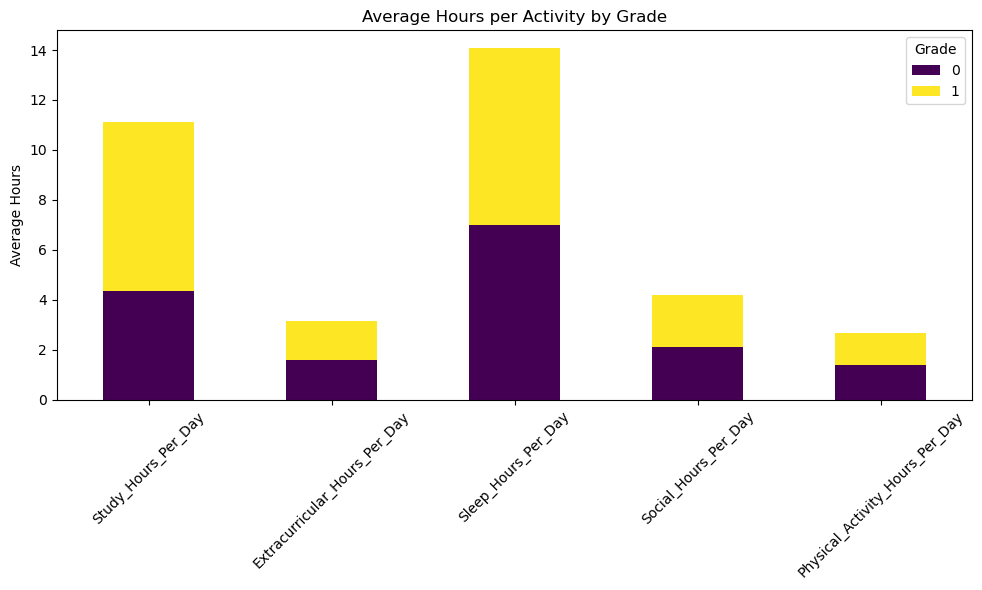

In [104]:
numeric_columns = ['Study_Hours_Per_Day', 
                   'Extracurricular_Hours_Per_Day', 
                   'Sleep_Hours_Per_Day', 
                   'Social_Hours_Per_Day', 
                   'Physical_Activity_Hours_Per_Day']


avg_by_grade = df.groupby('Grades')[numeric_columns].mean()

avg_by_grade.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Average Hours per Activity by Grade')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

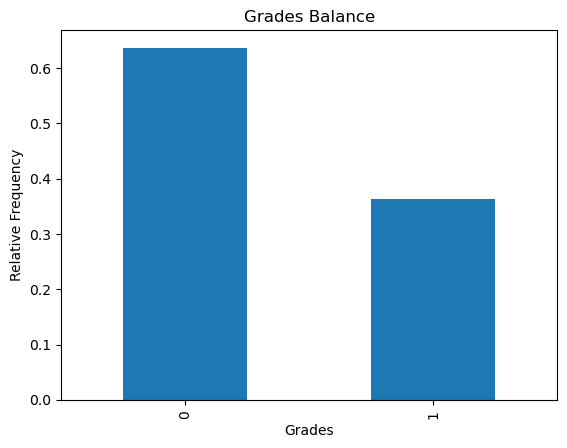

In [105]:
df['Grades'].value_counts(normalize=True).plot(kind='bar', xlabel ='Grades', ylabel ='Relative Frequency', title ='Grades Balance');

In [106]:
#spliting
X = df.drop(columns = 'Grades')
y = df['Grades']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [108]:
#Baseline
Baseline = y_train.value_counts(normalize=True).max()
Baseline

0.6345880681818182

In [120]:
model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth = 5,random_state= 42))

In [121]:
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Stress_Level'],
                                mapping=[{'col': 'Stress_Level',
                                          'data_type': dtype('O'),
                                          'mapping': Low         1
Moderate    2
High        3
NaN        -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [122]:
Y_pred_test = model.predict(X_train)

In [123]:
train_accuracy_score = model.score(X_train, y_train)
validation_accuracy_score = model.score(X_val, y_val)
test_accuracy_score = model.score(X_test, y_test)

In [124]:
print(train_accuracy_score)
print(validation_accuracy_score)
print(test_accuracy_score)

0.9732954545454545
0.9690340909090909
0.9706818181818182


In [114]:
tree_dept = model.named_steps['decisiontreeclassifier'].get_depth()

In [115]:
tree_dept


19

In [116]:
dept_hyperparameters = range(1, 19)

In [117]:
training_accr = []
validation_accr = []

for d in dept_hyperparameters:

    test_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth = d,random_state= 42))

    test_model.fit(X_train, y_train)

    training_accr.append(test_model.score(X_train, y_train))
    validation_accr.append(test_model.score(X_val, y_val))


print("Training Accuracy Scores:", training_accr[:3])
print("Validation Accuracy Scores:", validation_accr[:3])



Training Accuracy Scores: [0.8061789772727272, 0.8526988636363636, 0.9545454545454546]
Validation Accuracy Scores: [0.8096590909090909, 0.8465909090909091, 0.9548295454545455]


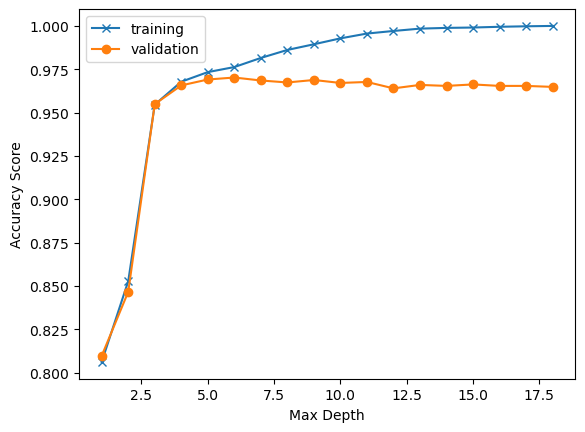

In [118]:
plt.plot(dept_hyperparameters, training_accr, label ='training', marker = 'x')
plt.plot(dept_hyperparameters, validation_accr, label ='validation', marker = "o")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

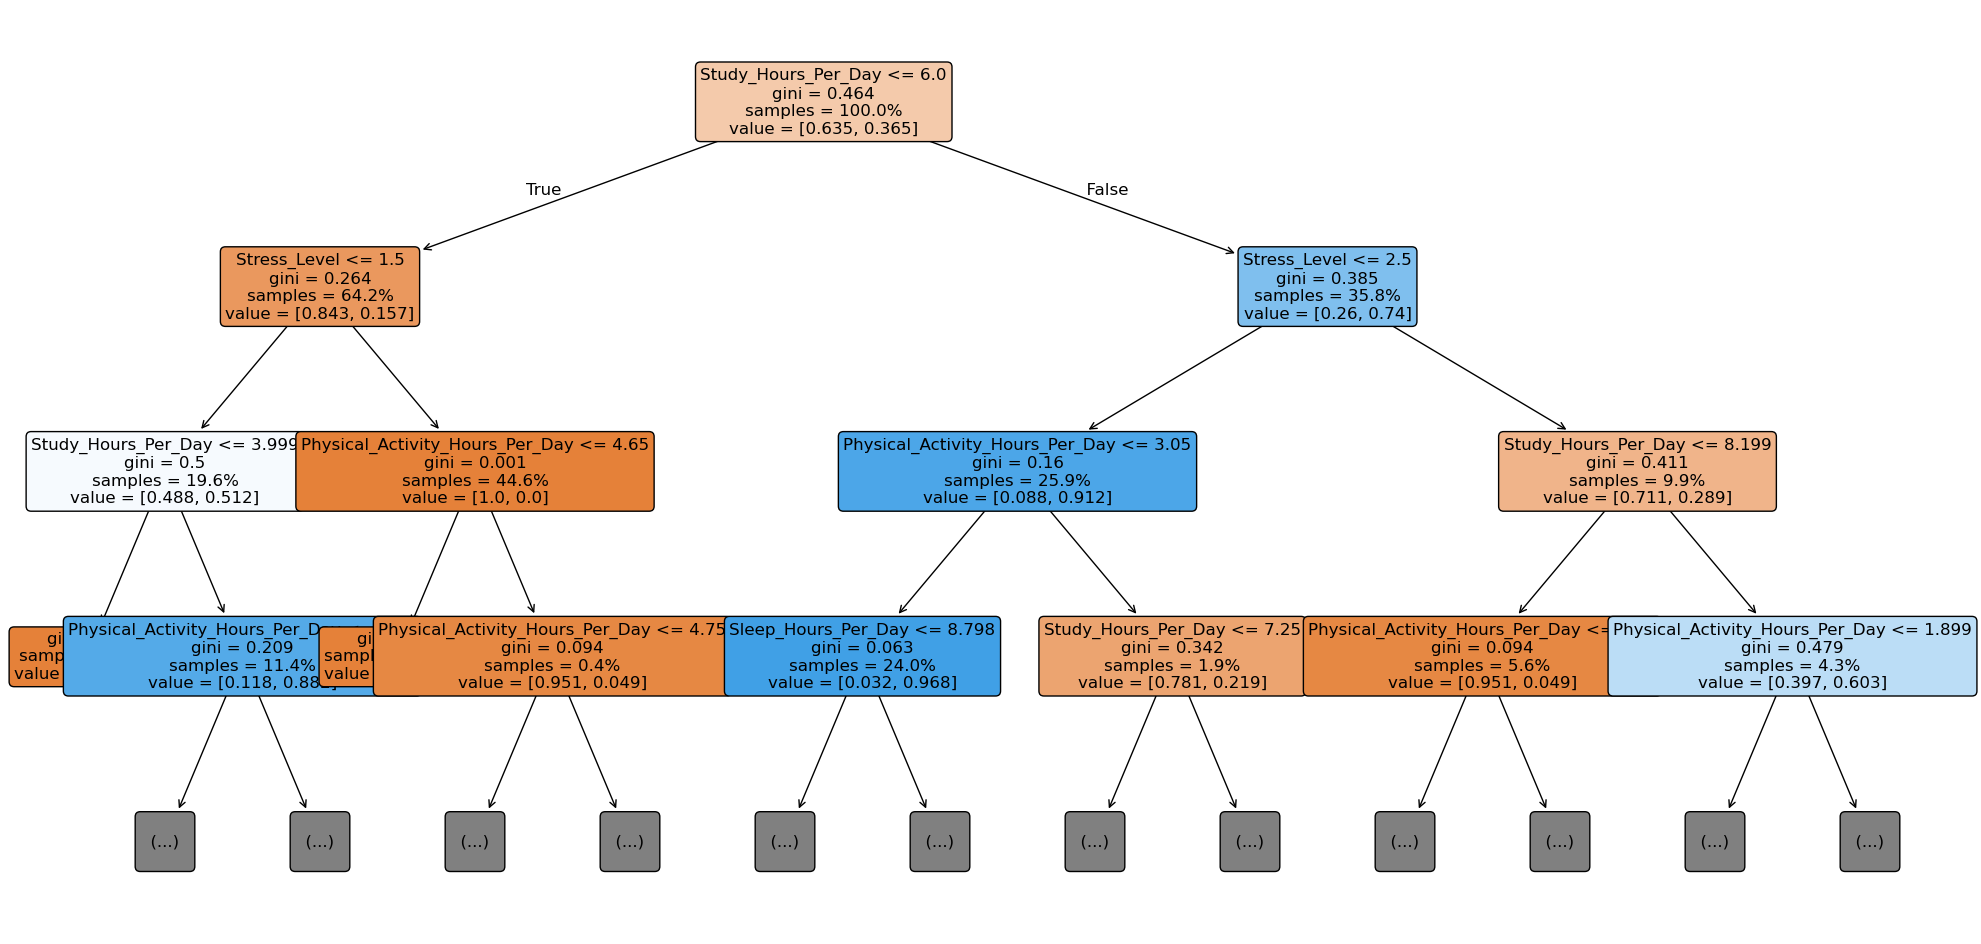

In [119]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [125]:
features = X_train.columns
importance = model.named_steps['decisiontreeclassifier'].feature_importances_

In [126]:
features_important = pd.Series( importance, index= features).sort_values()

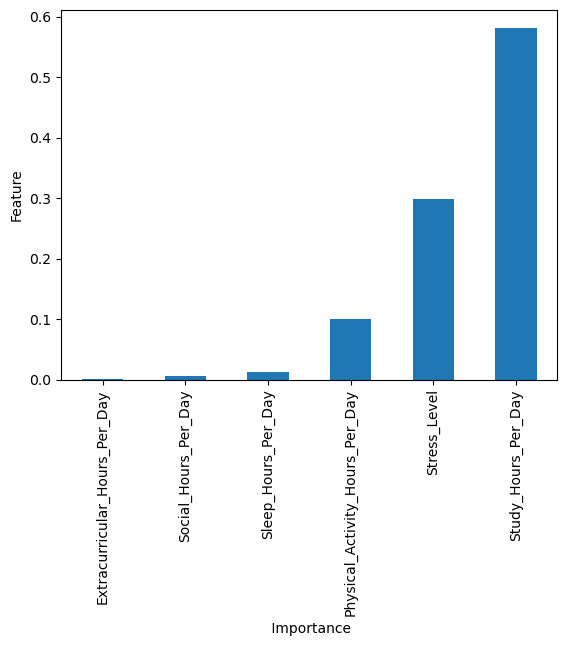

In [127]:
features_important.plot(kind= 'bar')
plt.xlabel(' Importance')
plt.ylabel('Feature')
plt.show()

In [128]:
def predict_student_lifestyle (Study_Hours_Per_Day, Extracurricular_Hours_Per_Day , Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day,Stress_Level):
    input = {'Study_Hours_Per_Day' : Study_Hours_Per_Day, 'Extracurricular_Hours_Per_Day': Extracurricular_Hours_Per_Day , 'Sleep_Hours_Per_Day': Sleep_Hours_Per_Day, 'Social_Hours_Per_Day': Social_Hours_Per_Day,
    'Physical_Activity_Hours_Per_Day': Physical_Activity_Hours_Per_Day, 'Stress_Level':Stress_Level}
                         
    df = pd.DataFrame(input, index=[0])
    prediction= model.predict(df)
    if prediction == 1:
        return 'This person will have a very good grade'
    else:
        return 'This person is likely not to have a good grade'

In [136]:
predict_student_lifestyle(8,4,10,10,10,'moderate')

'This person will have a very good grade'